In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Data Visualization:

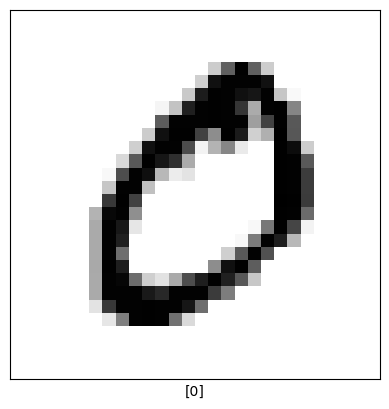

In [6]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [2]:
# Show first 25 images form the training dataset

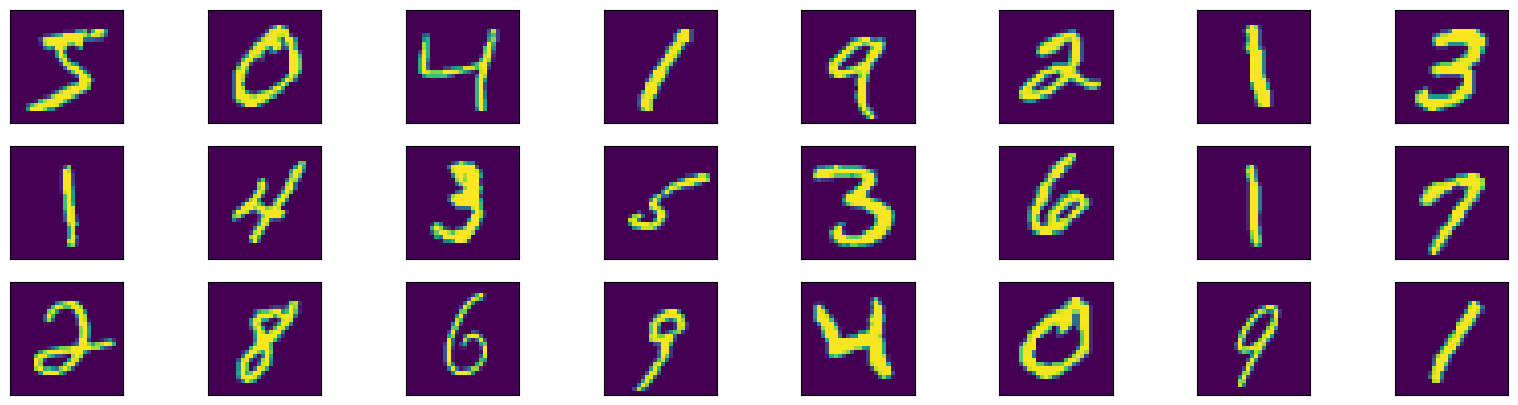

In [7]:
fig = plt.figure(figsize=(20,5))
for i in range(24):
    ax = fig.add_subplot(3, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

In [3]:
# Total number of images in each class(0-9).

<Axes: ylabel='count'>

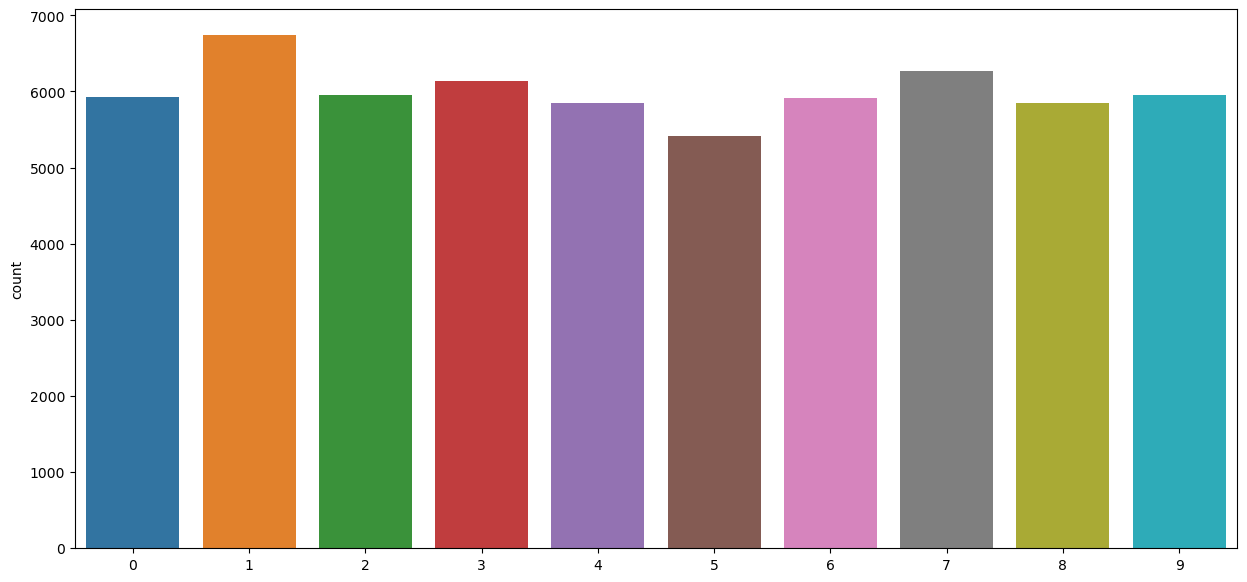

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(x=y_train)

In [8]:
# Flatten each image
X_train = np.array([image.flatten() for image in x_train])
X_test = np.array([image.flatten() for image in x_test])

### Apply Scaling:

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

### Model Building:

#### Logistic Regression:

In [11]:
model=LogisticRegression(max_iter=1000,multi_class='auto')
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Make prediction using x_test
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8376

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       980
           1       0.97      0.87      0.92      1135
           2       0.97      0.76      0.85      1032
           3       0.87      0.89      0.88      1010
           4       0.90      0.90      0.90       982
           5       0.99      0.26      0.41       892
           6       0.91      0.93      0.92       958
           7       0.97      0.83      0.90      1028
           8       0.51      0.96      0.66       974
           9       0.83      0.92      0.87      1009

    accuracy                           0.84     10000
   macro avg       0.88      0.83      0.83     10000
weighted avg       0.88      0.84      0.83     10000



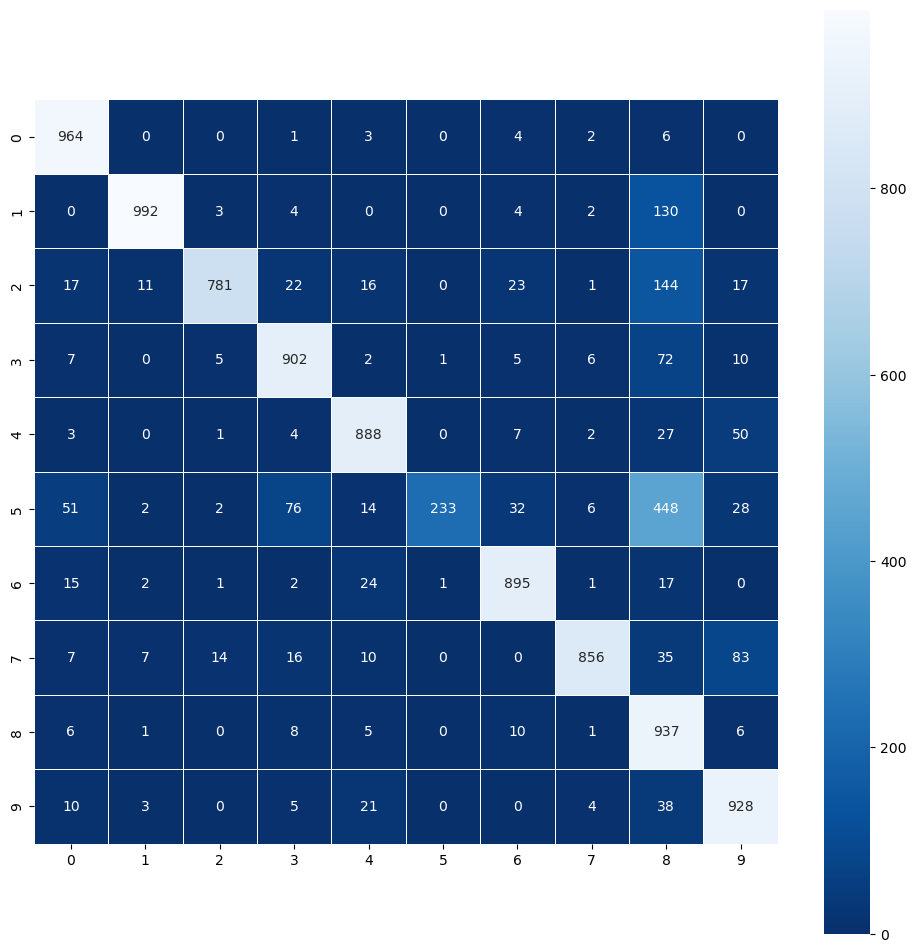

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,linewidths=0.5,square=True,cmap ='Blues_r',fmt='0.4g');

#### SVM:

In [15]:
model=SVC(kernel='linear')
model.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [16]:
# Make prediction using x_test
y_pred=model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9293

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.93      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.94      0.89      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



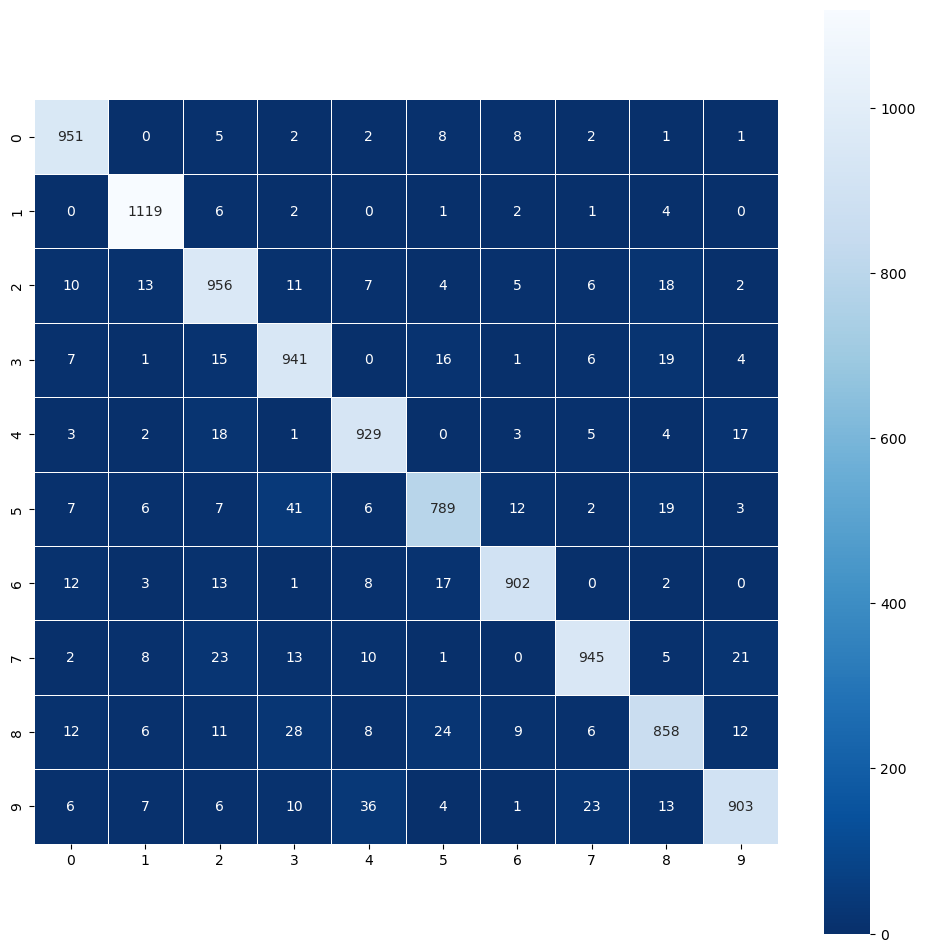

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,linewidths=0.5,square = True,cmap = 'Blues_r',fmt='0.4g');

#### KNN:

In [19]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [20]:
 # Make prediction using x_test
y_pred=model.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.9443

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



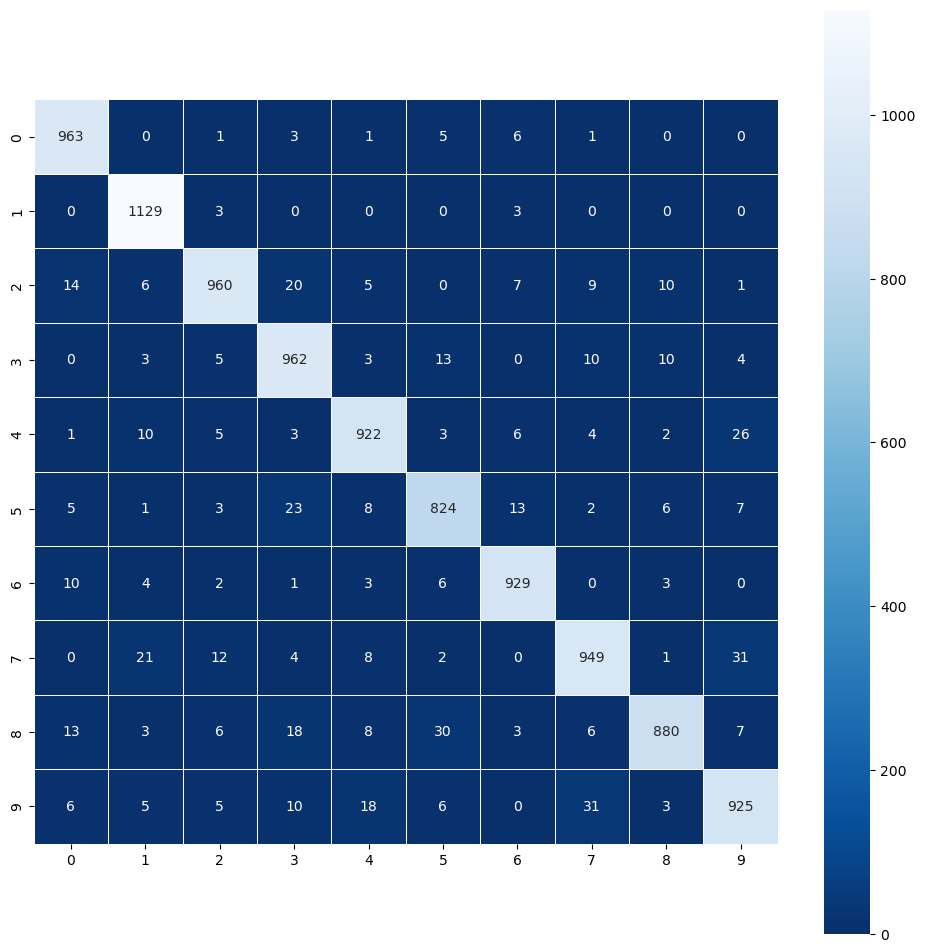

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,linewidths=0.5,square = True,cmap ='Blues_r',fmt='0.4g');

In [23]:
index = 0
classified_images = []
for label, predict in zip(y_test,y_pred):
    if label == predict: 
        classified_images.append(index)
    index +=1
    if len(classified_images) == 10:
        break
print("Ten Indexes are : ",classified_images)

Ten Indexes are :  [0, 1, 2, 3, 4, 5, 6, 7, 9, 10]


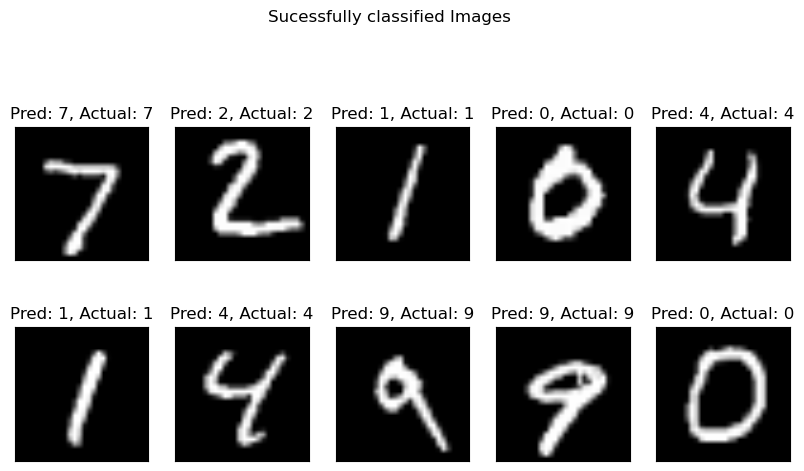

In [24]:
plt.figure(figsize=(10,10))
plt.suptitle('Sucessfully classified Images');
for plot_index,good_index in enumerate(classified_images):
    p = plt.subplot(4,5, plot_index+1) 
    p.imshow(X_test[good_index].reshape(28,28), cmap=plt.cm.gray,interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) 
    p.set_title(f'Pred: {y_pred[good_index]}, Actual: {y_test[good_index]}');

Accuracy of Logistic Regression is 84%.<br>
Accuracy of SVM is 93%.<br>
Accuracy of KNN is 94%.<br>
So comparing above models KNN gives best accuracy for Handwritten Digits Recoganization which is 94%. 

### CNN:

In [9]:
# Normalize the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print("x_train shape: ",x_train.shape)
print("test shape: ",x_test.shape) 

x_train shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


In [10]:
# Apply one hot encoding
from tensorflow import keras
n_classes = 10
print("Shape before one-hot encoding of train data: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding of train data: ", Y_train.shape)
print("Shape before one-hot encoding of test data: ", y_train.shape)
Y_test = keras.utils.to_categorical(y_test, n_classes) 
print("Shape after one-hot encoding of test data of test data: ", Y_test.shape)


Shape before one-hot encoding of train data:  (60000,)
Shape after one-hot encoding of train data:  (60000, 10)
Shape before one-hot encoding of test data:  (60000,)
Shape after one-hot encoding of test data of test data:  (10000, 10)


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(x_train, Y_train, batch_size=128, epochs=10, validation_data=(x_test, Y_test))

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 0.1987 - accuracy: 0.9417 - val_loss: 0.0765 - val_accuracy: 0.9760
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0627 - val_accuracy: 0.9787
Epoch 3/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0570 - val_accuracy: 0.9821
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0519 - val_accuracy: 0.9823
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0499 - val_accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 0.0633 - val_accuracy: 0.9828
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0612 - val_accuracy:

In [14]:
# evaluate test accuracy
score = model.evaluate(x_test, Y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.3900%


Testing accuracy of CNN is 98%.